In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('data_mobile_prices_range.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,int_memory,mobile_wt,ram,talk_time,touch_screen,wifi,price_range
0,8420,0,2.2,0,7,188,2549,19,0,1,2
1,1021,1,0.5,1,53,136,2631,7,1,0,2
2,563,1,0.5,1,41,145,2603,9,1,0,2
3,615,1,2.5,0,10,131,2769,11,0,0,2
4,1821,1,1.2,0,44,141,1411,15,1,0,1


<Axes: ylabel='count'>

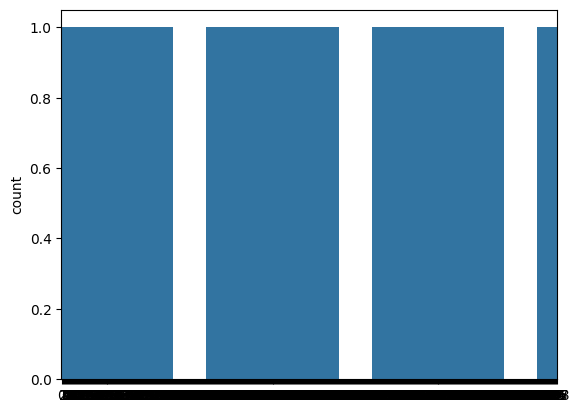

In [6]:
sns.countplot(data['price_range'])

In [7]:
data.shape

(499, 11)

In [8]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
int_memory       0
mobile_wt        0
ram              0
talk_time        0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  499 non-null    int64  
 1   blue           499 non-null    int64  
 2   clock_speed    499 non-null    float64
 3   dual_sim       499 non-null    int64  
 4   int_memory     499 non-null    int64  
 5   mobile_wt      499 non-null    int64  
 6   ram            499 non-null    int64  
 7   talk_time      499 non-null    int64  
 8   touch_screen   499 non-null    int64  
 9   wifi           499 non-null    int64  
 10  price_range    499 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 43.0 KB


In [10]:
#Defining X and Y
X = data.drop('price_range',axis=1)
Y = data['price_range']

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(349, 10)
(150, 10)
(349,)
(150,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.58395251,  1.08060255,  0.1732047 , ..., -0.80182796,
         1.00286945,  1.02612922],
       [ 1.30927455,  1.08060255,  0.67694169, ..., -1.36601739,
        -0.99713876, -0.97453613],
       [-1.47495214,  1.08060255,  1.18067869, ..., -0.04957538,
        -0.99713876, -0.97453613],
       ...,
       [-0.89194012,  1.08060255, -0.70833504, ..., -0.61376482,
        -0.99713876, -0.97453613],
       [-0.69683767,  1.08060255, -1.33800629, ..., -1.74214368,
        -0.99713876, -0.97453613],
       [-1.64021539, -0.92540963, -1.33800629, ...,  0.70267719,
        -0.99713876, -0.97453613]])

In [15]:
X_test

array([[ 1.11187678, -0.92540963,  0.92881019, ..., -0.23763853,
        -0.99713876,  1.02612922],
       [-0.50403055, -0.92540963, -0.45646655, ...,  0.13848776,
         1.00286945,  1.02612922],
       [ 0.12718325,  1.08060255,  0.29913895, ..., -0.9898911 ,
         1.00286945,  1.02612922],
       ...,
       [-0.8001272 ,  1.08060255, -0.20459805, ..., -1.36601739,
        -0.99713876, -0.97453613],
       [ 0.58854315, -0.92540963,  1.68441568, ...,  1.64299291,
         1.00286945,  1.02612922],
       [-0.96309513, -0.92540963, -1.33800629, ...,  1.45492977,
        -0.99713876,  1.02612922]])

In [16]:
Y_train

461    2
356    2
3      2
399    3
380    1
      ..
106    3
270    0
348    2
435    0
102    1
Name: price_range, Length: 349, dtype: int64

In [17]:
Y_test

460    2
73     3
231    3
175    2
237    3
      ..
193    3
5      1
116    2
45     1
16     3
Name: price_range, Length: 150, dtype: int64

a)Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [19]:
pv1 = lr.predict(X_test)
print(pv1)

[2 3 3 1 3 3 1 3 3 0 0 1 0 3 1 1 3 3 3 1 3 1 0 0 2 0 3 0 1 1 3 0 1 1 1 1 3
 1 3 3 2 0 3 0 3 3 1 2 1 0 0 1 3 1 1 0 2 1 2 1 1 1 1 2 0 2 2 3 1 1 0 2 3 3
 2 0 3 3 3 0 0 1 1 0 0 2 2 3 2 2 2 0 1 0 0 1 3 1 3 1 0 2 3 2 0 2 2 0 2 3 0
 3 0 1 1 2 1 3 3 3 1 2 0 1 0 3 0 3 2 1 3 3 2 2 3 2 3 2 2 1 1 3 0 3 3 3 1 3
 0 2]


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a1 = accuracy_score(Y_test,pv1)
print('Accuracy Score:',a1)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv1))
print('\nClassification Report:\n',classification_report(Y_test,pv1))

Accuracy Score: 0.8133333333333334

Confusion Matrix:
 [[28  3  0  0]
 [ 5 29  1  0]
 [ 0  9 26  7]
 [ 0  0  3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.71      0.83      0.76        35
           2       0.87      0.62      0.72        42
           3       0.85      0.93      0.89        42

    accuracy                           0.81       150
   macro avg       0.82      0.82      0.81       150
weighted avg       0.82      0.81      0.81       150



b) KNN Classification



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [22]:
pv2 = knn.predict(X_test)
print(pv2)

[2 2 3 2 3 2 1 2 2 0 0 3 1 3 1 2 3 2 2 1 2 1 1 0 1 0 2 1 0 0 2 0 1 3 1 2 3
 1 2 3 1 0 3 1 3 3 0 1 1 0 1 3 3 0 0 0 3 0 3 1 2 1 3 1 0 2 2 3 2 2 0 1 2 3
 1 0 3 3 3 0 0 1 1 0 1 3 2 3 3 3 2 1 1 0 1 0 3 1 3 1 0 0 3 2 0 3 3 0 3 2 1
 2 1 1 0 2 0 3 3 2 0 1 0 1 0 3 0 2 2 1 3 3 3 2 3 2 3 2 2 0 1 3 0 2 3 3 1 3
 1 1]


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a2 = accuracy_score(Y_test,pv2)
print('Accuracy Score:\n',a2)
print('\nConfusion Matrix:',confusion_matrix(Y_test,pv2))
print('\nClassification Report:\n',classification_report(Y_test,pv2))

Accuracy Score:
 0.5466666666666666

Confusion Matrix: [[22  8  1  0]
 [10 17  5  3]
 [ 2 13 15 12]
 [ 0  1 13 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        31
           1       0.44      0.49      0.46        35
           2       0.44      0.36      0.39        42
           3       0.65      0.67      0.66        42

    accuracy                           0.55       150
   macro avg       0.54      0.55      0.55       150
weighted avg       0.54      0.55      0.54       150



c) Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
pv3 = dt.predict(X_test)
print(pv3)

[3 3 3 1 3 3 1 2 3 0 0 1 1 3 1 1 3 3 3 1 3 1 0 0 2 0 2 0 1 1 3 0 1 2 2 1 3
 2 3 3 1 1 3 0 2 3 1 2 1 0 0 2 3 1 1 0 2 1 2 0 1 1 1 1 0 1 3 3 1 1 0 2 2 3
 2 0 3 3 3 0 0 2 1 0 1 2 3 3 3 2 2 1 1 1 0 1 3 1 3 1 0 2 3 2 0 3 1 0 2 2 0
 3 0 1 1 2 2 3 3 3 1 1 0 1 0 3 0 2 3 1 3 3 2 2 3 3 3 3 3 1 1 3 0 3 3 3 1 3
 0 3]


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a3 = accuracy_score(Y_test,pv3)
print('Accuracy Score:',a3)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv3))
print('\nClassification Report:\n',classification_report(Y_test,pv3))

Accuracy Score: 0.7

Confusion Matrix:  [[24  7  0  0]
 [ 5 25  5  0]
 [ 0 12 18 12]
 [ 0  0  4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.57      0.71      0.63        35
           2       0.67      0.43      0.52        42
           3       0.76      0.90      0.83        42

    accuracy                           0.70       150
   macro avg       0.71      0.71      0.70       150
weighted avg       0.70      0.70      0.69       150



D) Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=6)
rf.fit(X_train , Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=70)

In [28]:
pv4 = dt.predict(X_test)
print(pv4)

[3 3 3 1 3 3 1 2 3 0 0 1 1 3 1 1 3 3 3 1 3 1 0 0 2 0 2 0 1 1 3 0 1 2 2 1 3
 2 3 3 1 1 3 0 2 3 1 2 1 0 0 2 3 1 1 0 2 1 2 0 1 1 1 1 0 1 3 3 1 1 0 2 2 3
 2 0 3 3 3 0 0 2 1 0 1 2 3 3 3 2 2 1 1 1 0 1 3 1 3 1 0 2 3 2 0 3 1 0 2 2 0
 3 0 1 1 2 2 3 3 3 1 1 0 1 0 3 0 2 3 1 3 3 2 2 3 3 3 3 3 1 1 3 0 3 3 3 1 3
 0 3]


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a4 = accuracy_score(Y_test,pv4)
print('Accuracy Score:',a4)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv4))
print('\nClassification Report:\n',classification_report(Y_test,pv4))

Accuracy Score: 0.7

Confusion Matrix:  [[24  7  0  0]
 [ 5 25  5  0]
 [ 0 12 18 12]
 [ 0  0  4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.57      0.71      0.63        35
           2       0.67      0.43      0.52        42
           3       0.76      0.90      0.83        42

    accuracy                           0.70       150
   macro avg       0.71      0.71      0.70       150
weighted avg       0.70      0.70      0.69       150



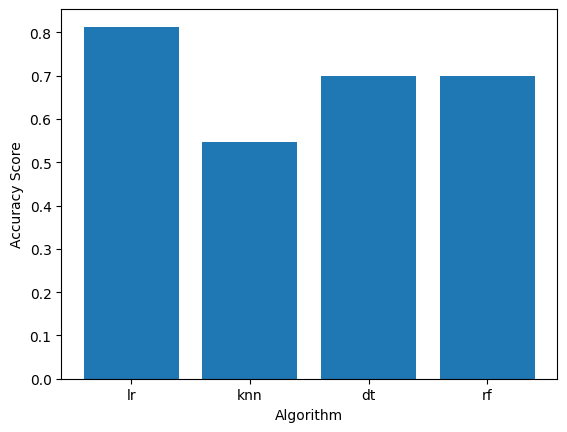

In [30]:
#To check the model with the best accuracy
plt.bar(x=['lr','knn','dt','rf'],height=[a1,a2,a3,a4])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

In [31]:
print('The model with the best accuracy:logistic regression')

The model with the best accuracy:logistic regression
